# LOGISTIC REGRESSION

In [2]:
! pip install pyforest
from pyforest import *
lazy_imports()

zsh:1: command not found: pip


['import numpy as np',
 'from sklearn.model_selection import train_test_split',
 'import tensorflow as tf',
 'import tqdm',
 'from sklearn.ensemble import GradientBoostingClassifier',
 'import seaborn as sns',
 'import pickle',
 'import keras',
 'import altair as alt',
 'from openpyxl import load_workbook',
 'import matplotlib.pyplot as plt',
 'import plotly as py',
 'import sklearn',
 'import re',
 'import sys',
 'import awswrangler as wr',
 'from sklearn.ensemble import RandomForestRegressor',
 'import os',
 'from sklearn.ensemble import GradientBoostingRegressor',
 'from pyspark import SparkContext',
 'from pathlib import Path',
 'import nltk',
 'import datetime as dt',
 'import pydot',
 'import plotly.graph_objs as go',
 'from sklearn.feature_extraction.text import TfidfVectorizer',
 'import lightgbm as lgb',
 'from sklearn import svm',
 'from sklearn.manifold import TSNE',
 'import statistics',
 'import gensim',
 'from sklearn.ensemble import RandomForestClassifier',
 'import spac

#### Features
* Preg => No. of Pregnancy
* Plas => Plasma
* Pres => Blood Pressure
* Skin => Skin Thickness
* Test => Insulin Test
* Mass => Body Mass
* Pedi => Diabetes Pedigree Function
* Age => Age
* Class => 1:Diabetic, 0:Non Diabetic

In [3]:
df = pd.read_csv('data/pima-indians-diabetes.csv')
df.head()

<IPython.core.display.Javascript object>

Preg  Plas  Pres  skin  test  mass   pedi  age  class
0     6   148    72    35     0  33.6  0.627   50      1
1     1    85    66    29     0  26.6  0.351   31      0
2     8   183    64     0     0  23.3  0.672   32      1
3     1    89    66    23    94  28.1  0.167   21      0
4     0   137    40    35   168  43.1  2.288   33      1

In [4]:
df.shape

(768, 9)

In [6]:
df.isnull().values.any()

False

array([[<AxesSubplot:title={'center':'Preg'}>,
        <AxesSubplot:title={'center':'Plas'}>,
        <AxesSubplot:title={'center':'Pres'}>,
        <AxesSubplot:title={'center':'skin'}>],
       [<AxesSubplot:title={'center':'test'}>,
        <AxesSubplot:title={'center':'mass'}>,
        <AxesSubplot:title={'center':'pedi'}>,
        <AxesSubplot:title={'center':'age'}>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>,

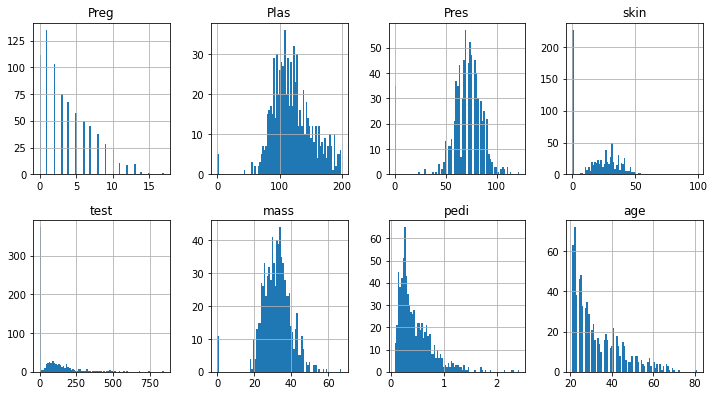

In [7]:
columns = list(df)[0:-1] # First 8 columns
df[columns].hist(bins=80,figsize=(12,50),layout=(14,4))

In [8]:
df.corr()

Preg      Plas      Pres      skin      test      mass      pedi  \
Preg   1.000000  0.129459  0.141282 -0.081672 -0.073535  0.017683 -0.033523   
Plas   0.129459  1.000000  0.152590  0.057328  0.331357  0.221071  0.137337   
Pres   0.141282  0.152590  1.000000  0.207371  0.088933  0.281805  0.041265   
skin  -0.081672  0.057328  0.207371  1.000000  0.436783  0.392573  0.183928   
test  -0.073535  0.331357  0.088933  0.436783  1.000000  0.197859  0.185071   
mass   0.017683  0.221071  0.281805  0.392573  0.197859  1.000000  0.140647   
pedi  -0.033523  0.137337  0.041265  0.183928  0.185071  0.140647  1.000000   
age    0.544341  0.263514  0.239528 -0.113970 -0.042163  0.036242  0.033561   
class  0.221898  0.466581  0.065068  0.074752  0.130548  0.292695  0.173844   

            age     class  
Preg   0.544341  0.221898  
Plas   0.263514  0.466581  
Pres   0.239528  0.065068  
skin  -0.113970  0.074752  
test  -0.042163  0.130548  
mass   0.036242  0.292695  
pedi   0.033561  0.173844  
age    1.000000  0.238356  
class  0.238356  1.000000

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'Correlation between various attributes')

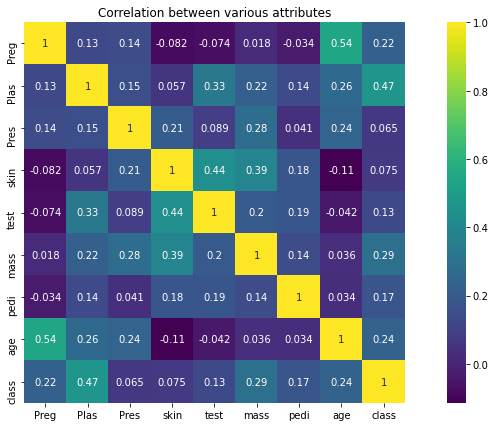

In [10]:
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),vmax=1,square=True,annot=True,cmap='viridis')
plt.title('Correlation between various attributes')

<IPython.core.display.Javascript object>

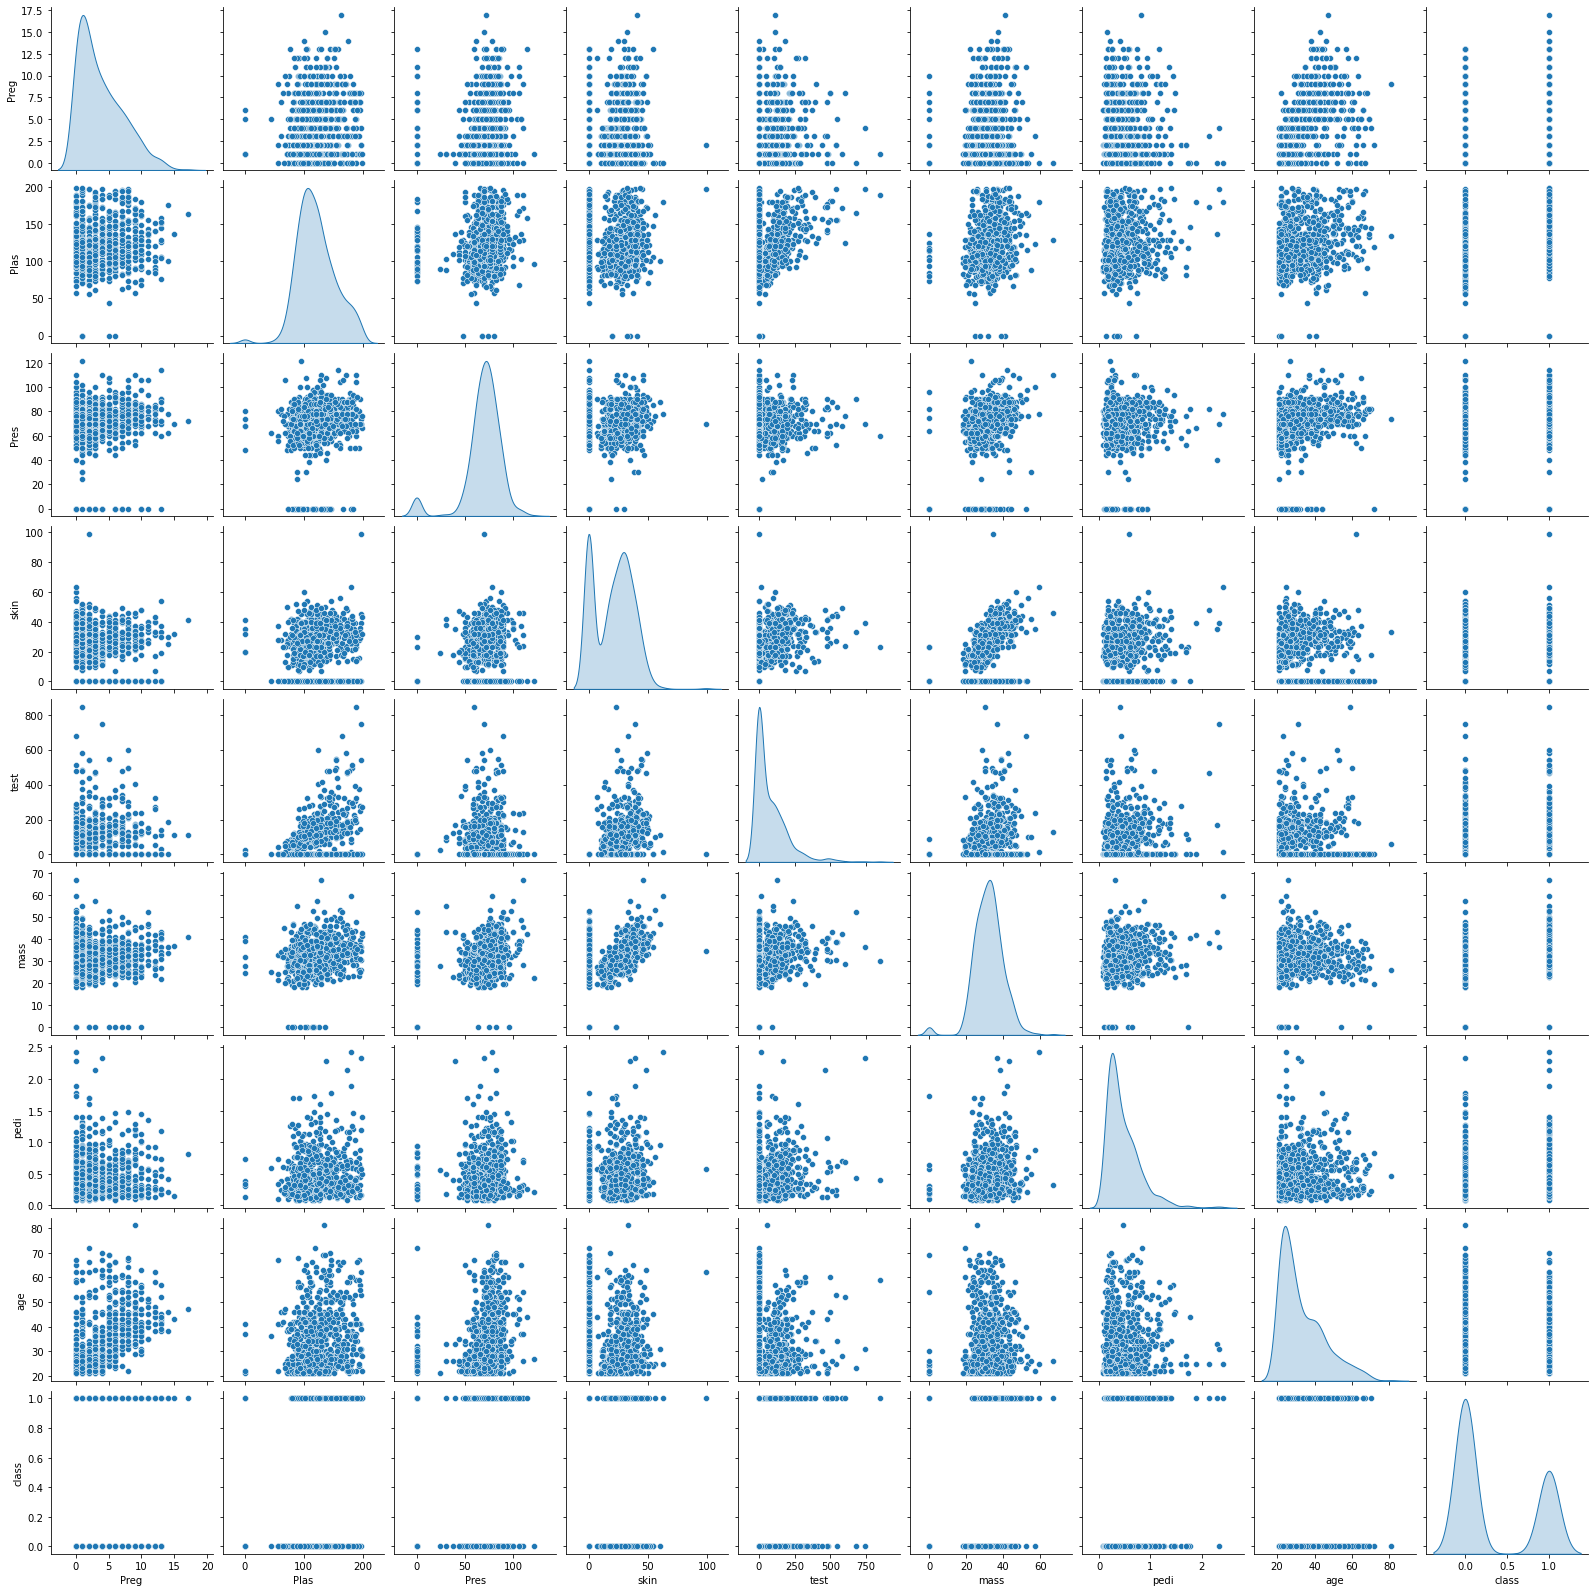

In [11]:
sns.pairplot(df,diag_kind='kde')

In [13]:
df['class'].value_counts()

0    500
1    268
Name: class, dtype: int64

In [17]:
from sklearn.model_selection import train_test_split

X = df.drop('class',axis=1)
Y = df['class']

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3,random_state=1)

In [15]:
X_train

Preg  Plas  Pres  skin  test  mass   pedi  age
88     15   136    70    32   110  37.1  0.153   43
467     0    97    64    36   100  36.8  0.600   25
550     1   116    70    28     0  27.4  0.204   21
147     2   106    64    35   119  30.5  1.400   34
481     0   123    88    37     0  35.2  0.197   29
..    ...   ...   ...   ...   ...   ...    ...  ...
645     2   157    74    35   440  39.4  0.134   30
715     7   187    50    33   392  33.9  0.826   34
72     13   126    90     0     0  43.4  0.583   42
235     4   171    72     0     0  43.6  0.479   26
37      9   102    76    37     0  32.9  0.665   46

[537 rows x 8 columns]

In [18]:
Y_train

88     1
467    0
550    0
147    0
481    0
      ..
645    0
715    1
72     1
235    1
37     1
Name: class, Length: 537, dtype: int64

#### Replace zeros with mean

In [20]:
from sklearn.impute import SimpleImputer
replace_ = SimpleImputer(missing_values=0,strategy="mean")
cols=X_train.columns

X_train = pd.DataFrame(replace_.fit_transform(X_train))
X_test = pd.DataFrame(replace_.fit_transform(X_test))

X_train.columns = cols
X_test.columns = cols

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [21]:
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

# Fit the model
model = LogisticRegression(solver="liblinear")
model.fit(X_train,Y_train)


LogisticRegression(solver='liblinear')

In [23]:
Y_predict = model.predict(X_test)
Y_predict

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0])

In [25]:
model_score = model.score(X_test,Y_test)
print(model_score)

0.7792207792207793


In [26]:
cm = metrics.confusion_matrix(Y_test,Y_predict,labels=[1,0])
df_cm = pd.DataFrame(cm,index = [i for i in ["1","0"]], columns=[i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize=(7,5))
sns.heatmap(df_cm,annot=True)